In [1]:
# ----------------------------------------------------------------------
# Step 1: Import all necessary modules for analysis
# ----------------------------------------------------------------------
# import modules for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import aux_func as aux

In [2]:
# ----------------------------------------------------------------------
# Step 2: Set up db connection and session
# ----------------------------------------------------------------------
# set up sqlalchemy engine
from sqlalchemy import create_engine
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

# set up sqlalchemy base
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

# map classes
Station = Base.classes.stations
Measurement = Base.classes.measurements

# set up session
from sqlalchemy.orm import Session
session = Session(engine)

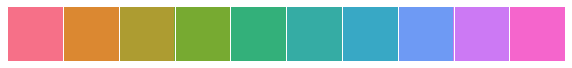

In [3]:
# ----------------------------------------------------------------------
# Step 4: Set overall chart appearances
# ----------------------------------------------------------------------
# set chart style
palette = sns.husl_palette(10)
sns.set(style="darkgrid", palette=palette)

# create dictionary with all color values
hex_codes = palette.as_hex()
palette_dict = {'light coral':hex_codes[0], 
                'orange':hex_codes[1], 
                'goldenrod':hex_codes[2], 
                'olive green':hex_codes[3], 
                'emerald':hex_codes[4], 
                'teal':hex_codes[5], 
                'cerulean':hex_codes[6], 
                'steel blue':hex_codes[7], 
                'lilac':hex_codes[8], 
                'pink':hex_codes[9]}

# show color palette
sns.palplot(palette)

# Precipitation Analysis

In [4]:
# ----------------------------------------------------------------------
# Step 5: Plot 12 months of precipitation data using using DF.plot.
#         Since didn't have data past August 2017, set end date at the 
#         last date where data was available
# ----------------------------------------------------------------------
# create variables for last year's date in string format and query (for readability)
last_year_start = (dt.date(2017,8,23) - dt.timedelta(days=365)).isoformat()
query = f'SELECT date, precipitation FROM measurements WHERE date > "{last_year_start}"'

# read query into dataframe
last_year_prec_df = pd.read_sql(query, engine)

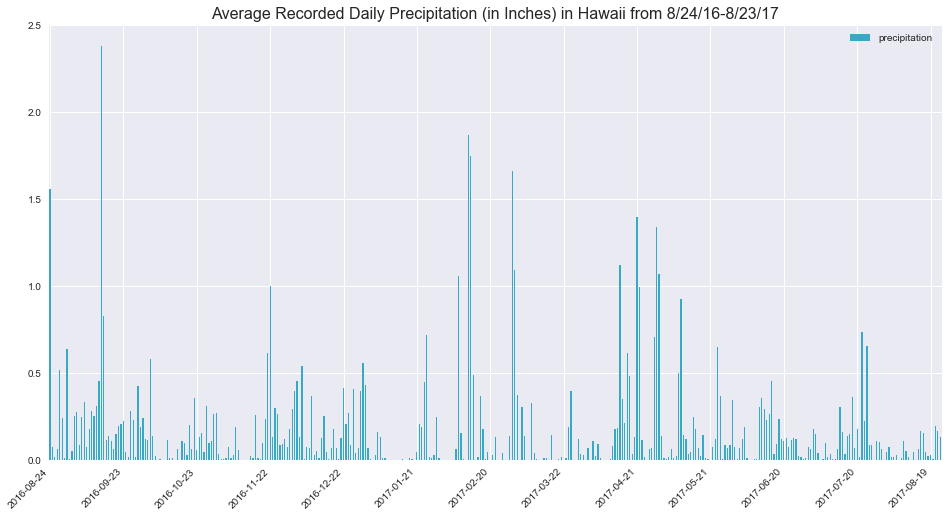

In [5]:
# set style
plt.rcParams["figure.figsize"] = [16,8]

# plot the dataframe
last_year_grouped_df = last_year_prec_df.groupby('date').mean().reset_index()
last_year_grouped_df.plot.bar(color=palette_dict['cerulean'])
plt.title('Average Recorded Daily Precipitation (in Inches) in Hawaii from 8/24/16-8/23/17', 
          size=16)

# set proper labels
plt.xticks([x*30 for x in np.arange(13)],
           [list(last_year_grouped_df['date'])[x*30] for x in np.arange(13)],
           rotation=45, horizontalalignment='right')
plt.show()

In [6]:
# display summary statistics
summary_stats_df = (last_year_prec_df.describe().reset_index().
                    rename(columns={'index':'stat'}).copy())
summary_stats_df['precipitation'] = summary_stats_df['precipitation'].round(2)
summary_stats_df

,stat,precipitation
0,count,2015.00
1,mean,0.18
2,std,0.46
3,min,0.00
4,25%,0.00
5,50%,0.02
6,75%,0.13
7,max,6.70


# Station Analysis

In [7]:
# ----------------------------------------------------------------------
# Step 6: Calculate the total number of stations
# ----------------------------------------------------------------------
total_stations = pd.read_sql('SELECT COUNT(*) AS "Total Stations" FROM stations', 
                             engine)['Total Stations'][0]
print(f"There are {total_stations} weather stations in Hawaii.")

There are 9 weather stations in Hawaii.


In [8]:
# ----------------------------------------------------------------------
# Step 7: Find the most active stations
# ----------------------------------------------------------------------
# pull the stations and observation counts in descending order
query = 'SELECT m.station, s.name, COUNT(m.temp) AS "Count Observations" \
         FROM measurements m JOIN stations s ON s.station = m.station \
         GROUP BY m.station ORDER BY COUNT(m.temp) DESC'
station_obs_count_desc = pd.read_sql(query,engine)

# display station with highest observation count and df of all stations
highest_obs = f'{station_obs_count_desc["station"][0]} {station_obs_count_desc["name"][0]}'
print(f'The station with the highest observation count is {highest_obs}.')
station_obs_count_desc

The station with the highest observation count is USC00519281 WAIHEE 837.5.


,station,name,Count Observations
0,USC00519281,WAIHEE 837.5,2772
1,USC00513117,KANEOHE 838.1,2696
2,USC00519397,WAIKIKI 717.2,2685
3,USC00519523,WAIMANALO EXPERIMENTAL FARM,2572
4,USC00516128,MANOA LYON ARBO 785.2,2484
5,USC00514830,KUALOA RANCH HEADQUARTERS 886.9,1937
6,USC00511918,HONOLULU OBSERVATORY 702.2,1932
7,USC00517948,PEARL CITY,683
8,USC00518838,UPPER WAHIAWA 874.3,342


# Temperature Analysis

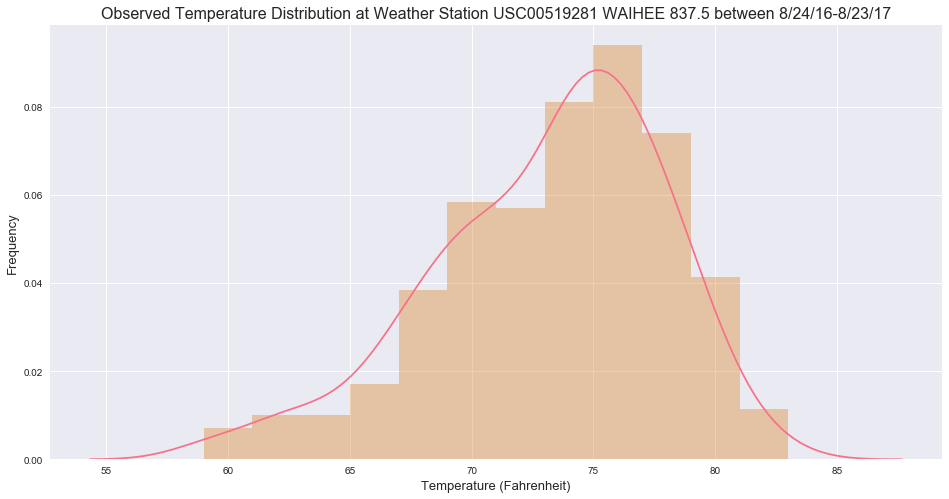

In [9]:
# ----------------------------------------------------------------------
# Step 8: Graph 12 months worth of temperature data from the station with
#       the most observations.
# ----------------------------------------------------------------------
# read query into dataframe
query = f'SELECT date, station, temp FROM measurements \
          WHERE date > "{last_year_start}" AND \
          station = "{station_obs_count_desc["station"][0]}"'
last_year_temp_df = pd.read_sql(query, engine)['temp']

# plot histogram
#plt.hist(x=last_year_temp_df, bins=12, histtype='bar')
sns.distplot(last_year_temp_df, bins=12, color=palette_dict['light coral'],
            hist_kws={'color':palette_dict['orange']})
plt.title(f"Observed Temperature Distribution at Weather Station {highest_obs} between 8/24/16-8/23/17",
         size=16)
plt.xlabel('Temperature (Fahrenheit)', size=13)
plt.ylabel('Frequency', size=13)
plt.show()

Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.

Use the average temperature as the bar height.

Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [13]:
# ----------------------------------------------------------------------
# Step 9: Calculate the likely average, min, and max for my theoretical 
#         trip
# ----------------------------------------------------------------------# 
# start and end dates for my trip
start_date = dt.date(2018, 6, 28)
end_date = dt.date(2018, 7, 4)

# min and max for data set
min_date = dt.date(2010, 1, 1)
max_date = dt.date(2017, 8, 23)

# set length of previous month
prev_month_length = 30

# get num days and years in data set
num_days = (end_date - start_date).days
num_years = int(round((max_date - min_date).days/365,0))

# create list of all dates to be searched
search_dates = aux.get_search_list(start_date, end_date, min_date, max_date, 
                                prev_month_length, num_days, num_years)

# using list of dates, get avg temp, min temp, max temp in a dataframe
trip_temp_df = aux.calc_temps(num_days, num_years, search_dates, engine)
trip_temp_df

,date,avg_temp,max_temp,min_temp
0,2017-07-04,76.574468,81,70
1,2017-07-03,74.808511,82,68
2,2017-07-02,75.166667,82,68
3,2017-07-01,74.958333,81,68
4,2017-06-30,75.380000,81,67
5,2017-06-29,74.705882,80,67
6,2017-06-28,74.770833,80,69
